# **Spotting Fake News with Python**

This project aims to investigate the task of spotting fake news and apply classic and modern machine learning techniques to develop a model that can classify news as real or fake. It is part of an assignment for the course `486205 - APRENDIZADO DE MÁQUINA` at the **Federal University of São Carlos (UFSCar)**, lectured by the professor **Tiago A. Almeida**.

---
## **Enviroment Setup and Loading Data**

The first step in this problem is to import the tools we will need further in the project. To begin the setup, we imported **pandas** and **NumPy** to manipulate the data.

News is written in a natural language that humans understand, so it is necessary to clean and prepare this data for machine processing. To satisfy our natural language processing needs throughout the project, we have decided to use the **NLTK** and **SkLearn** libraries. 

To improve our understanding of the task and the data we are working with, we have chosen **matplotlib** and **seaborn** as our visualization libraries to clarify the extracted information from the processed news.

Compiling all the decisions, we imported the following libraries for this project:

- pandas
- NumPy
- NLTK
- SkLearn
- matplotlib
- seaborn

In [1]:
#Basic imports
import numpy as np
import pandas as pd

#NLP
import nltk
import sklearn

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

The data we are using in this project was provided by the professor for use in the assignment. It compiles news automatically collected during 2019 and 2020 with no supervision. This indicates the possibility of data corruption or information loss during the collection phase. A given news presented in the dataset can be classified in a binary way:

- **1** -> The news is <span style="color:LightGreen">trustworthy</span> (Real).
- **0** -> The news is <span style="color:Tomato">not trustworthy</span> (Possibly Fake).

However, it wasn't possible to check if the information was reliable in a large amount of samples. Thus, these news articles do not exhibit any label attached to them. The data is organized by month and year in separate CSV files, which include a unique identification for each article, both the titles and contents, the date when the article written and the binary label attached to them. To work with this data, we imported each file and compiled them in a single data frame.

In [2]:
files = ["news_data_01_Jan_2019.csv",
         "news_data_02_Feb_2019.csv",
         "news_data_03_Mar_2019.csv",
        # "news_data_04_Apr_2019.csv",
        # "news_data_05_May_2019.csv",
        # "news_data_06_Jun_2019.csv",
        # "news_data_07_Jul_2019.csv",
        #  "news_data_08_Aug_2019.csv",
        #  "news_data_09_Sep_2019.csv",
        #  "news_data_10_Oct_2019.csv",
        #  "news_data_11_Nov_2019.csv",
        #  "news_data_12_Dec_2019.csv",
        #  "news_data_13_Jan_2020.csv",
        #  "news_data_14_Feb_2020.csv",
        #  "news_data_15_Mar_2020.csv",
        #  "news_data_16_Apr_2020.csv",
        #  "news_data_17_May_2020.csv",
        #  "news_data_18_Jun_2020.csv",
        #  "news_data_19_Jul_2020.csv",
        #  "news_data_20_Aug_2020.csv",
        #  "news_data_21_Sep_2020.csv",
        #  "news_data_22_Oct_2020.csv",
        #  "news_data_23_Nov_2020.csv",
        #  "news_data_24_Dec_2020.csv",
         ]

data = pd.concat((pd.read_csv("./data/"+f) for f in files), ignore_index=True)
data.set_index('id',inplace=True)

Y = pd.read_csv('./data/train.csv')
Y.set_index('id',inplace=True)
data = data.join(Y)
data.rename(columns={"label": "class_label"},inplace=True)

---
## **Exploring the news and their content**

First, we looked at some of the news and their content. We can observe the lack of annotation in many news articles. Another thing we immediately notice is the massive size of the dataset, with over 2 million articles in total.

In [3]:
display(data)

,title,content,date,class_label
id,,,,
id-1070176,Five signings Man City could make to cure thei...,"In World Cup winner Benjamin Mendy , Man City ...",2019-01-16,NaN
id-1072326,How hackers could have stolen your seats or ca...,PASSENGERS travelling with one of 141 internat...,2019-01-17,NaN
id-1062508,"Onimusha: Warlords review | Switch, PS4 and Xb...",At times it can feel that Capcom ’ s samurai a...,2019-01-15,0.0
id-1080550,From bins bedlam to Brexit - an eventful year ...,The Local Democracy Reporting Scheme is markin...,2019-01-18,NaN
id-1114787,New York Aborted More Babies In Three Years Th...,New York saw more abortions in a three-year ti...,2019-01-26,1.0
...,...,...,...,...
id-1279452,Man City star Bernardo Silva rejects Cristiano...,Bernardo Silva may have filled the void left b...,2019-03-14,0.0
id-1327964,My 3 Weeks Listening To Only 1 Song & What I L...,NaN,2019-03-26,1.0
id-1307473,Jeremy Corbyn &apos;stomps out&apos; of Brexit...,Jeremy Corbyn “ stomped out ” of a meeting wit...,2019-03-20,0.0


To better understand the impact of the missing labels and possible information loss during the collection phase, we further investigate the missing values counting their occurrence and the relative percentage of missing values for each feature. While some articles may lack titles or content information, only about $1\%$ of the total articles are affected by this. When looking at the missing labels, we can observe that around $50\%$ of the articles aren't classified, half of the dataset size.

In [4]:
# Counting NaN values in each column
nan_counts = data.isna().sum()
print(f"\033[93mNaN values in each column:\033[0m\n{nan_counts}\n")

# Calculating the percentage of NaN values in each column
nan_percentage = (nan_counts / len(data)) * 100
print(f"\033[93mPercentage of NaN values in each column:\033[0m\n{nan_percentage}\n")

# Counting the total number of NaN values in the dataset
total_nan = nan_counts.sum()
print(f"\033[93mTotal NaN values in the dataset:\033[0m\n{total_nan}")

NaN values in each column:
title            3463
content          4018
date                0
class_label    179532
dtype: int64

Percentage of NaN values in each column:
title           1.019429
content         1.182808
date            0.000000
class_label    52.850162
dtype: float64

Total NaN values in the dataset:
187013


This lack of information poses a significant challenge in classifying news articles. We are not specialized in this area to accurately fill in the missing labels. Therefore, we decided to exclude these articles from the dataset and only work with items that have a label.

In [5]:
# Excluding the NaN values
data.dropna(inplace=True)

Moving further into the exploratory analysis phase, we checked the distribution of real and fake labeled articles in the dataset. For this, we counted each label and graphed them in a bar plot with the amount of articles and percentage for each label. The bars are color-coded <span style="color:LightGreen">green</span> for <span style="color:LightGreen">trustworthy articles</span> and <span style="color:Tomato">red</span> for <span style="color:Tomato">untrustworthy articles</span>. We can notice that there are considerably more fake articles in the data compared to real ones. Almost $80\%$ of the news articles are fake, which is something we had to account for later in the training stages.

C:\Users\luwul\AppData\Local\Temp\ipykernel_22496\1847919721.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


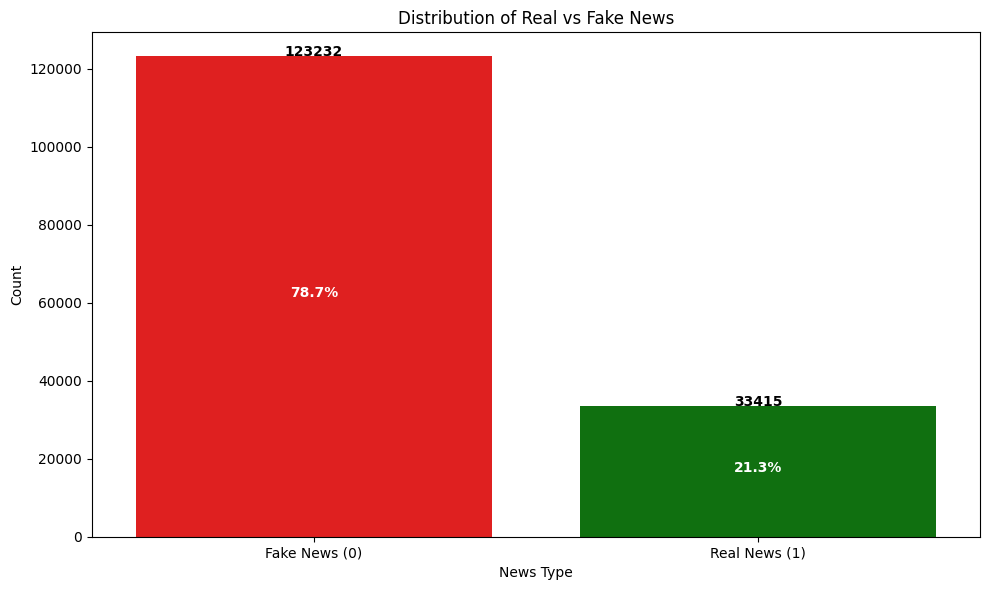

In [6]:
label_counts = data['class_label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    palette=['red', 'green'])

# Customize titles and labels
plt.xlabel('News Type')
plt.ylabel('Count')
plt.title('Distribution of Real vs Fake News')
plt.xticks([0, 1], ['Fake News (0)', 'Real News (1)'])

# Add count on top of each bar
for i, count in enumerate(label_counts.values):
    plt.text(
        i,
        count + 100,
        f'{count}',
        ha='center',
        fontweight='bold'
    )

# Add percentage on top of each bar
total = len(data)
for i, count in enumerate(label_counts.values):
    percentage = (count / total) * 100
    plt.text(
        i,
        count/2,
        f'{percentage:.1f}%',
        ha='center',
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

To prepare the data for a deeper analysis and later be fed into machine learning algorithms, we transformed the articles written in natural language into a more computer-friendly representation. Firstly, we removed digits, punctuation, and words of 3 characters or shorter. This reduces the amount of tokens in the resulting representation, and they can be safely removed since they don't add much information value to the context of the articles.

In [7]:
# Remove Numbers
data['content'] = data['content'].str.replace(r'\d+', '',regex=True)
data['title'] = data['title'].str.replace(r'\d+', '',regex=True)

# Remove Short Words
data['content'] = data['content'].str.replace(r'(\b\w{1,3}\b)', '',regex=True)
data['title'] = data['title'].str.replace(r'(\b\w{1,3}\b)', '',regex=True)

# Remove Punctuation
data['content'] = data['content'].str.replace(r'[^\w\s]', '',regex=True)
data['title'] = data['title'].str.replace(r'[^\w\s]', '',regex=True) 

With a cleaner text to work with, we start the process of tokenizing the articles into term-document matrices. As for the technique chosen for representing the data, we decided on the classical approach term frequency-inverse document frequency (TF-IDF). Due to the massive size of the data we are dealing with, we decided to also implement a step of lemmatization to reduce the words to their lemma and further reduce the tokens in the representation. The article's titles and content were transformed separately and their words were annotated with a suffix when merged into the main dataframe object.

In [8]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

vect = TfidfVectorizer(
    max_features=3500,
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    tokenizer=LemmaTokenizer()
)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\luwul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luwul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luwul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
bow_content = vect.fit_transform(data['content'])
vocab_content = vect.vocabulary_
content = pd.DataFrame(bow_content.toarray(),index=data.index.values,columns=vect.get_feature_names_out())

bow_title = vect.fit_transform(data['title'])
vocab_title = vect.vocabulary_
title = pd.DataFrame(bow_title.toarray(),index=data.index.values,columns=vect.get_feature_names_out())

c:\Users\luwul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\luwul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(
c:\Users\luwul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


-- Further Analysis

In [10]:
class0 = data[data['class_label'] == 0].index
class1 = data[data['class_label'] == 1].index

top_content_0 = content.loc[class0].mean(axis=0).sort_values(ascending=False).head(5)
top_content_1 = content.loc[class1].mean(axis=0).sort_values(ascending=False).head(5)

print(f"\033[93mTop Content Words (Fake Articles) \033[0m\n{top_content_0}\n")
print(f"\033[93mTop Content Words (Real Articles)\033[0m\n{top_content_1}\n")

top_title_0 = title.loc[class0].mean(axis=0).sort_values(ascending=False).head(5)
top_title_1 = title.loc[class1].mean(axis=0).sort_values(ascending=False).head(5)

print(f"\033[93mTop Title Words (Fake Articles) \033[0m\n{top_title_0}\n")
print(f"\033[93mTop Title Words (Real Articles)\033[0m\n{top_title_1}\n")

Top Content Words (Fake Articles) 
said         0.046055
trump        0.032992
year         0.027773
people       0.022019
president    0.021230
dtype: float64

Top Content Words (Real Articles)
trump        0.050387
president    0.033823
said         0.027327
state        0.025561
people       0.024079
dtype: float64

Top Title Words (Fake Articles) 
trump     0.022080
brexit    0.011748
say       0.011716
apos      0.008139
deal      0.008111
dtype: float64

Top Title Words (Real Articles)
trump        0.036342
video        0.014597
democrat     0.011191
venezuela    0.009888
border       0.009826
dtype: float64



In [11]:
data.drop(columns='content',inplace=True)
data.drop(columns='title',inplace=True)
data.drop(columns='date',inplace=True)

data = data.join(content,rsuffix='_c')
data = data.join(title,rsuffix='_t')

display(data)

,class_label,abandoned,aber,ability,able,abortion,abrams,abroad,absence,absolute,...,yemen_t,york_t,young_t,youth_t,youtube_t,zealand_t,zero_t,zimbabwe,zone_t,zuckerberg
id,,,,,,,,,,,,,,,,,,,,,
id-1062508,0.0,0.0,0.0,0.000000,0.107257,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id-1114787,1.0,0.0,0.0,0.000000,0.000000,0.70877,0.0,0.0,0.059885,0.0,...,0.0,0.341658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id-1135972,1.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id-1050721,1.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id-1103156,0.0,0.0,0.0,0.022979,0.018046,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id-1292577,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id-1282472,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id-1279452,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
## **Applying machine learning to detect fake news**

We tested multiple machine-learning approaches to detecting fake news, from classical ones like K-Nearest Neighbors to more sophisticated ones using shallow Neural Networks and Random Decision Trees. We first split the processed data into two sets: a training set and a testing set for comparing the different methods. For the trained models' accuracy, we used the ROC AUC Score metric to compute the similarity of the predicted labels with the actual labels of the articles

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, data.columns!='class_label'],
    data['class_label'],
    test_size=0.2,
    random_state=24)

### K-Nearest Neighbors (KNN)

KNN is a simple and intuitive algorithm. It classifies a new data point based on the majority class of its k nearest neighbors. This method doesn't have a training stage since it simply memorizes all of the data to later use for comparison in the inference stage. Its performance is extremely slow for large volumes of data, which is the situation we are dealing with, and the resulting accuracy isn't very high. It was the starting point of machine learning, but nowadays most problems require more elaborate solutions.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
model = model.fit(X_train.values, y_train.values)

train_pred = model.predict(X_train.values)
test_pred = model.predict(X_test.values)

print("|| KNN ||")
print("AUC on Train: {:.3f}%".format(100*roc_auc_score(y_train, train_pred)))
print("AUC on Test: {:.3f}%".format(100*roc_auc_score(y_test, test_pred)))

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model = model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("|| Naive Bayes - Multinomial ||")
print("AUC on Train: {:.3f}%".format(100*roc_auc_score(y_train, train_pred)))
print("AUC on Test: {:.3f}%".format(100*roc_auc_score(y_test, test_pred)))

### Linear Regression

Linear Regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables. The model tries to find the best-fitting straight line that minimizes the difference between predicted and actual values. While it's efficient and works well for problems with linear patterns, the scenario we are dealing with is more complex. Still, Linear Regression is a classical technique in machine learning and serves as a valuable baseline for more sophisticated models.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("|| Linear Regression ||")
print("AUC on Train: {:.3f}%".format(100*roc_auc_score(y_train, train_pred)))
print("AUC on Test: {:.3f}%".format(100*roc_auc_score(y_test, test_pred)))

### Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes. It models the probability of an event occurring between 0 and 1, which can be used to classify data into two categories. Logistic Regression is fast and effective when the classes are linearly separable, but it's not the best approach with imbalanced datasets or complex patterns. The task in which we are applying this technique has a complex nature, so we didn't expect this method to perform exceptionally. Despite this, this technique is a strong baseline for many classification problems.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    random_state=56,
    C=1,
    max_iter=4000)
model = model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("|| Logistic Regression - 4k Iter ||")
print("AUC on Train: {:.3f}%".format(100*roc_auc_score(y_train, train_pred)))
print("AUC on Test: {:.3f}%".format(100*roc_auc_score(y_test, test_pred)))

### Artificial Neural Network

Neural Networks are a powerful tool for classification tasks. They can learn complex patterns in the data by simulating the structure and function of the human brain through layers of interconnected nodes. Each layer transforms the input data using learned weights and activation functions. Neural networks are among the most powerful and widely used tools in modern machine learning, but they require large amounts of data and computational power to be effective. We have a large amount of data to use in the training, but due to limitations regarding the computational power we opted to train small networks.

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(256,256,128,64),
    activation='relu',
    solver='adam',
    momentum=0.87,
    beta_1=0.9,
    beta_2=0.99,
    batch_size='auto',
    random_state=24,
    learning_rate='invscaling',
    learning_rate_init=0.0001,
    alpha=0.0002,
    max_iter=2000)
model = model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("|| NN - 4 layers ||")
print("AUC on Train: {:.3f}%".format(100*roc_auc_score(y_train, train_pred)))
print("AUC on Test: {:.3f}%".format(100*roc_auc_score(y_test, test_pred)))

### SVM Linear Kernel

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

model = make_pipeline(StandardScaler(), LinearSVC(dual='auto',max_iter=2000))
model = model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("|| SVM - Linear ||")
print("AUC on Train: {:.3f}%".format(100*roc_auc_score(y_train, train_pred)))
print("AUC on Test: {:.3f}%".format(100*roc_auc_score(y_test, test_pred)))

### SVM Non-Linear Kernel

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(),SVC(gamma='auto',max_iter=2000))
model = model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("|| SVM ||")
print("AUC on Train: {:.3f}%".format(100*roc_auc_score(y_train, train_pred)))
print("AUC on Test: {:.3f}%".format(100*roc_auc_score(y_test, test_pred)))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5,random_state=2)
model = model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("|| Random Forest ||")
print("AUC on Train: {:.3f}%".format(100*roc_auc_score(y_train, train_pred)))
print("AUC on Test: {:.3f}%".format(100*roc_auc_score(y_test, test_pred)))

---
## **Experiment Results and Comments**